In [2]:
from gensim import models
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import decomposition
from sklearn import preprocessing

cbow_model = models.KeyedVectors.load_word2vec_format("../../data/tunning/cbow.kv")
data = pd.DataFrame(cbow_model.vectors)
data.index = cbow_model.index_to_key 

X = data.values

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [3]:
tsne = TSNE(n_components=3) 
coord= tsne.fit_transform(X_scaled)
print(coord.shape)

/home/id1897/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(7231, 3)


/home/id1897/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.8/site-packages/sklearn/

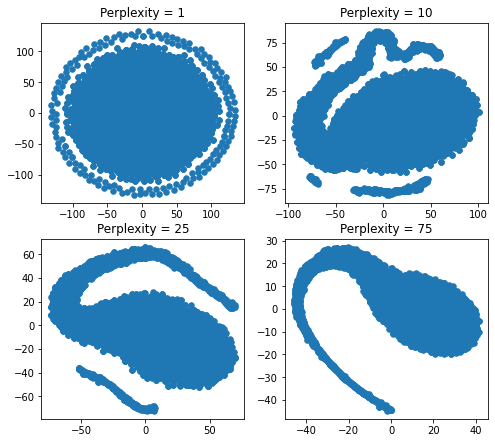

In [29]:
#Jouer avec les différents paramètres : 
#p : le nombre de voisins les plus proches en fonction duquel t-SNE déterminera les voisins potentiels
#n : dimension de l'espace inférieur
plt.figure(figsize = (8,4))
plt.subplots_adjust(top = 1.5) 
for index, p in enumerate([1, 10, 25, 75]):
    tsne = TSNE(n_components = 2, perplexity = p, random_state=0)
    tsne_results = tsne.fit_transform(X)
    tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
    plt.subplot(2,2,index+1)
    plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], s=30)
    plt.title('Perplexity = '+ str(p))
plt.show()